# Frequência de Brunt-Väisälä

* PET - Física UFRN
* Petiano: Gabriel Zuza
* Data: 07/2021

O Objetivo desse `Notebook`  não é abordar de forma teórica as deduções e métodos envolvidos nos problemas, mas na prática, aplicar tais conceitos obtendo resultados concretos e representativos.

# Introdução Teórica

A frequência de Brunt-Väisälä é uma medida da estabilidade do fluido em relação a deslocamentos verticais, como aqueles causados por convecção. Mais precisamente, é a frequência na qual uma parte de fluido se deslocada verticalmente oscilando dentro de um ambiente estaticamente estável.
Recebe o nome dos meteorologistas David Brunt e Vilho Väisälä que descreveram esse efeito inicialmente para a atmosfera. Ele pode ser usado como uma medida de estratificação atmosférica.

Na atmosfera, uma das consequencias da frequência de Brunt-Väisälä, visualmente, é a formação de nuvens em formatos de linhas ou tiras. Como representado na imagem abaixo.


![solar layers](https://i.imgur.com/6l1ked0.png)

Você já deve ter se perguntado qual é o princípio físico que sustenta essa morfologia na formação de nuvens. Vamos ver como é dado esse efeito.

A frequência de Brunt-Väisälä é costumeiramente representada pela letra $N$ que representa Νέφος, grego para nuvem, indicando novamente a origem desse efeito

Inicialmente cnsiderando uma parcela de ar de volume definido $V$ com densidade $\rho_0$.

Esse volume $V$ está exposto em um ambiente que (assim como na atomsfera) a densidade é função da altura, ou seja $\rho = \rho(z)$.

Se movimentarmos esse volume verticalmente por uma quantia $z'$ mantendo $\rho_0$ e $V$, esse volume estará sujeito a uma força gravitacional extra contra seus arredores conforme a seguinte equação.

$$
\large{ \rho_0 \frac{\partial^2z'}{\partial t^2} = -g\left[\rho(z) - \rho(z+z') \right] }
$$ 

Onde $g$ é aceleração da gravidade local.

Agora, vamos usar a seguinte aproximação linear:

$$
\large{ \rho(z+z') - \rho(z) =  \frac{\partial\rho(z)}{\partial z} z'}
$$

Assim, isolando substituindo essa aproximação a primeira equação e isolando a derivada segunda obtemos:

$$
\large{  \frac{\partial^2z'}{\partial t^2} = \frac{g}{\rho_0} \frac{\partial\rho(z)}{\partial z} z'} 
$$

Com isso, obtemos uma equação diferencial parcial de segunda ordem. A sua solução é dada na seguinte forma:

$$
\large{ z' = z'_0 e^{i\sqrt{N}t} }
$$

Onde N é a frequência de Brunt-Väisälä, dada por:

$$
\large{ N = \sqrt{ - \frac{g}{\rho_0} \frac{\partial \rho(z)}{\partial z}}} 
$$

A dedução completa para o caso da Brunt-Väisälä na atmosfera pode ser encontrada na referência [1]

Entretanto vale a pena comentar que esse mesmo efeito, ocorre de maneira análoga em estudos para a oceanografia e também em interiores estelares.

A frequência de Brunt-Väisälä pode ser visualizada também ao colocar uma rolha em um reservatório com água desde que seja proporcionado um deslocamento inicial (assim como usado na dedução da Equação Diferencial acima). 
Como o leitor pode conferir no GIF abaixo [2].

![](https://media.giphy.com/media/3q2SXNUfzmuzEk983U/giphy.gif)

## Dados

O Modelo MSIS-90 é um modelo epírico que descreve a temperatura neutra e as densidades na atmosfera da Terra desde o solo até as alturas termosféricas. Abaixo de 72,5 km, o modelo é baseado principalmente na tabulação do MAP Handbook (Labitzke et al., 1985) da temperatura e pressão médias zonais por Barnett e Corney. Abaixo de 20 km, esses dados foram complementados com médias do Centro Meteorológico Nacional (NMC). Acima de 72,5 km, o MSISE-90 é essencialmente um modelo MSIS-86 revisado, levando em consideração dados derivados de voos de ônibus espaciais e resultados de dispersão incoerentes mais recentes. Esse modelo é mais usado e mais adequado para estudos que abrangem várias fronteiras atmosféricas.

O Modelo MSIS-90 está disponível implementado atravez desse link [ \[3\] ](https://ccmc.gsfc.nasa.gov/modelweb/models/msis_vitmo.php) em um site de hospedagem da NASA, no site é possivel escolher vários parâmetros para quais deseja-se que o modelo retorne valores, e também um período de data e intevalo de altura a ser estudado.

Para a nossa análise vamos selecionar dados do MSIS-90 para uma faixa de autura de 0-200 Km e passo de 5 Km.

Especificando essas restrições diretamente no site do MSIS-90 e fazendo o download dos dados em um arquivo `.txt`

Os parâmetros selecionados estão listados na tabela abaixo.

|Parâmetro|Unidade|
|---------|-------|
|Altura| km|
|O| cm$^{-3}$ |
|N2| cm$^{-3}$ |
|O2| cm$^{-3}$ |
|Densidade| g/cm$^{-3}$ |
|Temperatura| K|

## Importando Bibliotecas e Declarando Funções e Constantes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import R as R

Definindo uma função para aprimorar a estética dos nossos plots.

In [2]:
def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

## Lendo os dados

Vamos ler os dados como normalmente fazemos em python, redenominei o arquivo para *atmos.txt*, vamos fazer o slice declarando diversas listas, uma para cada parâmetro disponível, incluindo a altura que é nossa variável independente,

In [3]:
dados = np.loadtxt('atmos.txt')
h = dados[:,0]
o = dados[:,1]
n2 = dados[:,2]
o2 = dados[:,3]
d = dados[:,4]
t = dados[:,5]

Vamos usar nesse notebook o estilo escuro do matplotlib, apenas por questões estéticas, e também para trazer ao leitor o conhecimento dessa possibilidade, para tanto, basta roda a próxima linha de código.

In [4]:
plt.style.use('dark_background')

## Plotando

Vamos começar com o gráfico das densidades de moleculas pela altura, em nosso modelo conseguimos proporções para cada uma das moléculas $O$,$O_2$ e $N_2$.

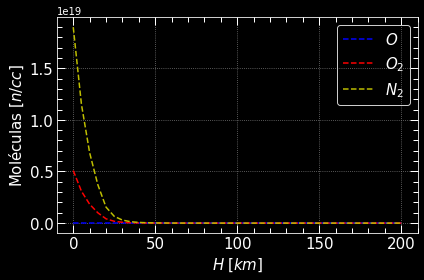

In [5]:
opt_plot()
plt.plot(h,o,'b--',label='$O$')
plt.plot(h,o2,'r--',label=r'$O_2$')
plt.plot(h,n2,'y--',label=r'$N_2$')
plt.xlabel(r'$H \; [km]$',fontsize=15)
plt.ylabel('Moléculas $[n/cc]$',fontsize=15)
legend = plt.legend(fontsize=15,framealpha=1)
frame = legend.get_frame()
frame.set_facecolor("none")
plt.tight_layout()
#plt.savefig('atmos/1.png',dpi=300,transparent=True)

Veja que quando estamos usando o *dark_background* o matplotlib já ajusta automaticamente a cor dos eixos, ticks, labels e legendas para dar contraste com o fundo preto.

Agora, vamos ver como a densidade total de massa se comporta em relação a altura.

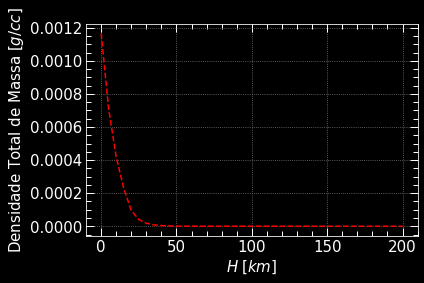

In [6]:
opt_plot()
plt.plot(h,d,'r--',label='Total')
plt.xlabel(r'$H \; [km]$',fontsize=15)
plt.ylabel('Densidade Total de Massa $[g/cc]$',fontsize=15)
#legend = plt.legend(fontsize=15,framealpha=1)
#frame = legend.get_frame()
#frame.set_facecolor("none")
plt.tight_layout()
#plt.savefig('atmos/2.png',dpi=300,transparent=True)

Por último, vamos verificar como é o comportamento da temperatura em relação à altitude. Assim, vamos usar algumas definições das camadas atmosféricas plotando elas no formato *facecolor*, isso por que as camadas atmosféricas são definidas levando em conta justamente a temperatura na determinada altura.

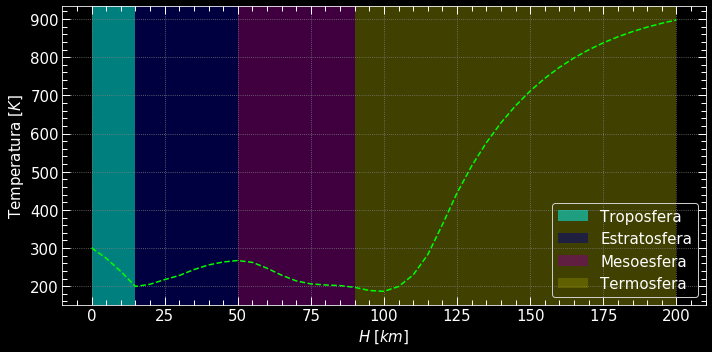

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
opt_plot()
plt.plot(h,t,'--',c='lime')
plt.xlabel(r'$H \; [km]$',fontsize=15)
plt.ylabel('Temperatura $[K]$',fontsize=15)

ax.axvspan(0,15,facecolor = 'cyan',alpha = 0.5,label='Troposfera')
ax.axvspan(15,50, facecolor='navy', alpha = 0.5,label='Estratosfera')
ax.axvspan(50,90, facecolor ='purple', alpha = 0.5,label='Mesoesfera')
ax.axvspan(90,200, facecolor ='olive', alpha = 0.5,label='Termosfera')

legend = plt.legend(fontsize=15,framealpha=1)
frame = legend.get_frame()
frame.set_facecolor("none")
plt.tight_layout()
#plt.savefig('atmos/3.png',dpi=300,transparent=True)

## Gravidade

A gravidade varia em relação a altura, assim, a aceleração da gravidade também sera função da altura, pela segunda lei de newton, temos que

$$
F = m a
$$
$$
m g = \frac{G M m}{r^2}
$$
$$
\therefore g = \frac{G M}{r^2}
$$

No nível do mar vamos definir uma aceleração $g_0$:
$$
g_0 = \frac{G M}{R_\bigoplus^2}
$$

Onde $R_\bigoplus$ é o raio da terra.

Assim a gravidade a uma distância $r = R_\bigoplus + h$ será:
$$
g = \frac{G M}{(R_\bigoplus+h)^2}
$$

Fatorando $R_\bigoplus^2$ no denominador, Temos:

$$
g = \frac{G M}{R_\bigoplus^2}\frac{1}{(1+h/R_\bigoplus)^2}
$$

$$
g = g_0\frac{1}{(1+h/R_\bigoplus)^2}
$$


$$\therefore g(h) =\frac{g_0}{(1 + h/R_\bigoplus)^2}$$

Implementando a equação deduzida, e plotando, temos:

In [8]:
g0 = 9.81
Re = 6400
g = g0 / (1+ (h/Re))**2

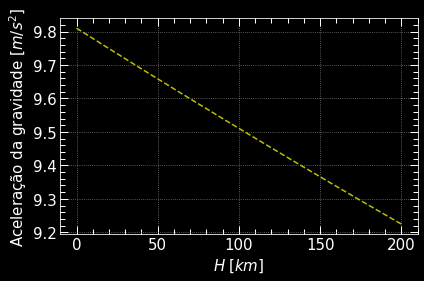

In [9]:
opt_plot()
plt.plot(h,g,'y--')
plt.xlabel(r'$H \; [km]$',fontsize=15)
plt.ylabel('Aceleração da gravidade $[m/s^2]$',fontsize=15)
#legend = plt.legend(fontsize=15,framealpha=1)
#frame = legend.get_frame()
#frame.set_facecolor("none")
plt.tight_layout()
#plt.savefig('atmos/4.png',dpi=300,transparent=True)

## Pressão

Já a pressão será dada, em pascal pela seguinte equação:

$$P = \frac{R \rho T}{M}$$

Onde $R$ é a constante universal dos gases, $\rho$ a densidade, $T$ a temperatura e $M$ a massa molecular do gás como um todo, então será necessário, primeiro determinar a massa molar.

In [10]:
M = (28*n2 + 32*o2 + 16*o) / (n2 + o2 + o)

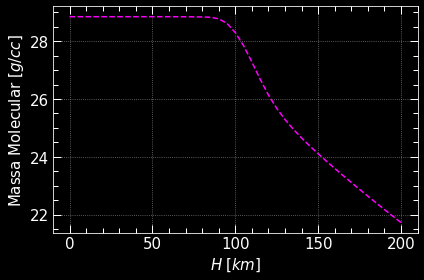

In [11]:
opt_plot()
plt.plot(h,M,c='magenta',ls='--')
plt.xlabel(r'$H \; [km]$',fontsize=15)
plt.ylabel('Massa Molecular $[g/cc]$',fontsize=15)
#legend = plt.legend(fontsize=15,framealpha=1)
#frame = legend.get_frame()
#frame.set_facecolor("none")
plt.tight_layout()
#plt.savefig('atmos/5.png',dpi=300,transparent=True)

Implementando a pressão, agora com a massa molecular.

In [12]:
P = R*d*t*1e6/M

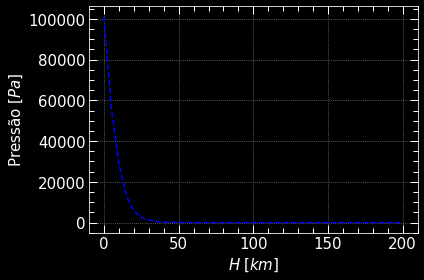

In [13]:
opt_plot()
plt.plot(h,P,'b--')
plt.xlabel(r'$H \; [km]$',fontsize=15)
plt.ylabel('Pressão $[Pa]$',fontsize=15)
#legend = plt.legend(fontsize=15,framealpha=1)
#frame = legend.get_frame()
#frame.set_facecolor("none")
plt.tight_layout()
#plt.savefig('atmos/6.png',dpi=300,transparent=True)

Converterndo para ATM.

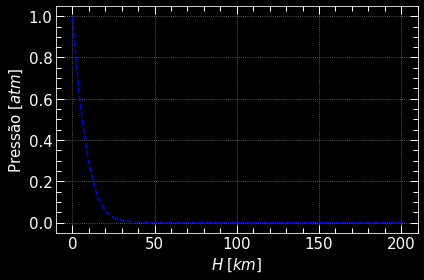

In [14]:
opt_plot()
plt.plot(h,P/101325,'b--')
plt.xlabel(r'$H \; [km]$',fontsize=15)
plt.ylabel('Pressão $[atm]$',fontsize=15)
#legend = plt.legend(fontsize=15,framealpha=1)
#frame = legend.get_frame()
#frame.set_facecolor("none")
plt.tight_layout()
#plt.savefig('atmos/6.1.png',dpi=300,transparent=True)


## A Frequência de Brunt-Vaisala

Para calcular a frequência de Brunt Vaisala, vamos prescisar saber como a pressão varia com a altura, ou seja, da derivada da pressão em relação a altura


$$\displaystyle N^2 = g(h)\frac{1}{\rho}\frac{dP}{dh}$$

Perceba que ainda não calculamos a derivada, para tanto, vamos uasr a função `np.diff()`do numpy, ao utilizar esse método para derivar um vetor de comprimento $l$, o vetor resultado tem comprimento $l-1$ pois é usado o ponto $n+1$ para calcular a derivada no ponto $n$, então quando chega no último não há um sucessor dele para realização do calculo. Para corregir isso, vamos repetir o último valor da derivada como aproximação fazendo um `np.append` do ultimo valor no próprio vetor

In [15]:
dPdh = np.diff(P) / np.diff(h)
dPdh = np.append(dPdh,dPdh[-1])


Plotando a derivada obitida

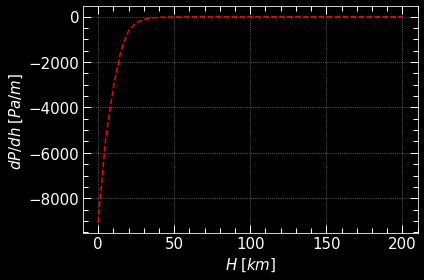

In [16]:
opt_plot()
plt.plot(h,dPdh,'red',ls='--')
plt.xlabel(r'$H \; [km]$',fontsize=15)
plt.ylabel(r'$dP/dh \; [Pa/m]$ ',fontsize=15)
#legend = plt.legend(fontsize=15,framealpha=1)
#frame = legend.get_frame()
#frame.set_facecolor("none")
plt.tight_layout()
#plt.savefig('atmos/7.png',dpi=300,transparent=True)

Finalmente, implementando a equação da frequência de Brunt Vaisala

In [17]:
N = np.sqrt( -g / d * dPdh*1e-9)

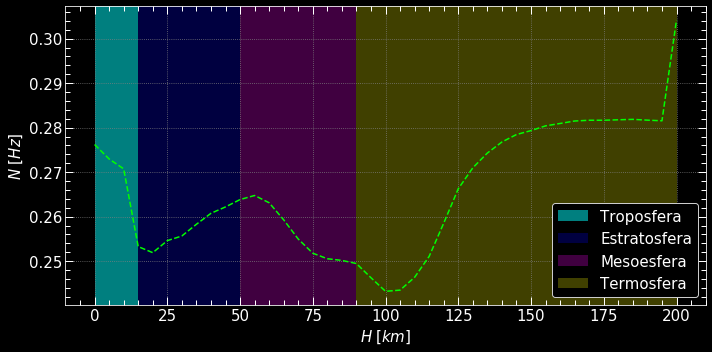

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
opt_plot()
plt.plot(h,N,'lime',ls='--')
plt.xlabel(r'$H \; [km]$',fontsize=15)
plt.ylabel(r'$N$ $[Hz]$',fontsize=15)


ax.axvspan(0,15,facecolor = 'cyan',alpha = 0.5,label='Troposfera')
ax.axvspan(15,50, facecolor='navy', alpha = 0.5,label='Estratosfera')
ax.axvspan(50,90, facecolor ='purple', alpha = 0.5,label='Mesoesfera')
ax.axvspan(90,200, facecolor ='olive', alpha = 0.5,label='Termosfera')

#ax.text(150,6e4, 'UV', fontsize=18, color = 'b')
#ax.text(1200,6e4, 'IR', fontsize=18, color = 'r')
#ax.text(420,6e4, 'VISÍVEL', fontsize=18, color = 'green')

legend = plt.legend(fontsize=15,framealpha=1)
frame = legend.get_frame()
#frame.set_facecolor("none")
plt.tight_layout()
#plt.savefig('atmos/8.1.png',dpi=300,transparent=True)


Calculando o comprimento de onda associado a essa frequência:

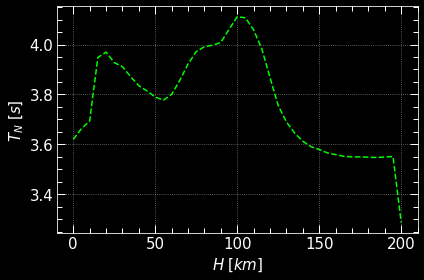

In [19]:
opt_plot()
plt.plot(h,1/N,'lime',ls='--')
plt.xlabel(r'$H \; [km]$',fontsize=15)
plt.ylabel(r'$T_N$ $[s]$',fontsize=15)
#legend = plt.legend(fontsize=15,framealpha=1)
#frame = legend.get_frame()
#frame.set_facecolor("none")
plt.tight_layout()
#plt.savefig('atmos/9.png',dpi=300,transparent=True)


E, por fim, o quadrado da frequencia.

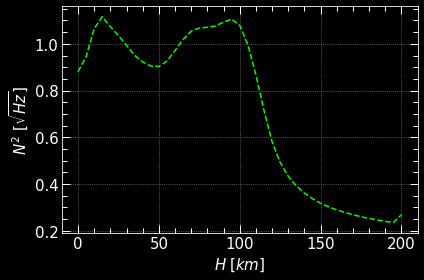

In [20]:
N = -g / P * dPdh

opt_plot()
plt.plot(h,N,'lime',ls='--')
plt.xlabel(r'$H \; [km]$',fontsize=15)
plt.ylabel(r'$N^2$ $[\sqrt{Hz}]$',fontsize=15)
#legend = plt.legend(fontsize=15,framealpha=1)
#frame = legend.get_frame()
#frame.set_facecolor("none")
plt.tight_layout()
#plt.savefig('atmos/10.png',dpi=300,transparent=True)


# Referências

[1] - Andrews, D.G. (2010) An Introduction to Atmospheric Physics. 2nd Edition, Cambridge University Press, Cambridge.

[2] - [VID 20200421 214953, No Youtube](https://www.youtube.com/watch?v=_DqOyvWwqWI&ab_channel=FabrizioCroccolo)

[3] - [MSIS-E-90 Atmosphere Model](https://ccmc.gsfc.nasa.gov/modelweb/models/msis_vitmo.php)